In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    import sklearn

In [3]:
df = pd.read_csv("nfl_betting_data.csv", encoding='utf-8')
games_elo = pd.read_csv("nflelo.csv", encoding='utf-8')

In [4]:
# merge games_elo with df
# Cleaning games_elo and df to merge correctly
wsh_map = {'WSH' : 'WAS'}
games_elo.loc[games_elo.team1 == 'WSH', 'team1'] = 'WAS' 
games_elo.loc[games_elo.team2 == 'WSH', 'team2'] = 'WAS'
df.loc[(df.schedule_date == '2016-09-19') & (df.team_home == 'MIN'), 'schedule_date'] = datetime.datetime(2016, 9, 18)
df.loc[(df.schedule_date == '2017-01-22') & (df.schedule_week == 21), 'schedule_date'] = datetime.datetime(2017, 2, 5)
df.loc[(df.schedule_date == '1990-01-27') & (df.schedule_week == 21), 'schedule_date'] = datetime.datetime(1990, 1, 28)
df.loc[(df.schedule_date == '1990-01-13'), 'schedule_date'] = datetime.datetime(1990, 1, 14)
games_elo.loc[(games_elo.date == '2016-01-09'), 'date'] = datetime.datetime(2016, 1, 10)
games_elo.loc[(games_elo.date == '2016-01-08'), 'date'] = datetime.datetime(2016, 1, 9)
games_elo.loc[(games_elo.date == '2016-01-16'), 'date'] = datetime.datetime(2016, 1, 17)
games_elo.loc[(games_elo.date == '2016-01-15'), 'date'] = datetime.datetime(2016, 1, 16)
df = df.merge(games_elo, left_on=['schedule_date', 'team_home', 'team_away'], right_on=['date', 'team1', 'team2'], how='left')



In [5]:
df = df.drop(columns=['qb1_adj',
       'qb2_adj', 'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value',
       'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post',
       'qbelo2_post', 'score1', 'score2','qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'date', 'season',
       'neutral', 'playoff', 'team1', 'team2', 'elo1_pre_y', 'elo2_pre_y', 'elo1_post','elo2_post'])


In [6]:
df = df.dropna()
df

,schedule_date,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,...,favorite_win,favorite_cover,over,elo1_pre_x,elo2_pre_x,elo_difference,elo_prob1,elo_prob2,qbelo1_pre,qbelo2_pre
0,9/1/1979,1979,1,TB,DET,TB,-3.0,30.0,79.0,9.0,...,1,1,1,1385.204000,1487.039000,101.835000,0.447188,0.552812,1382.928035,1501.886317
1,9/2/1979,1979,1,BUF,MIA,MIA,-5.0,39.0,74.0,15.0,...,1,0,0,1422.820000,1573.513000,150.693000,0.379119,0.620881,1423.239353,1559.950522
2,9/2/1979,1979,1,CHI,GB,CHI,-3.0,31.0,78.0,11.0,...,1,0,0,1485.806000,1462.502000,23.304000,0.624412,0.375588,1483.909490,1464.019768
3,9/2/1979,1979,1,DEN,CIN,DEN,-3.0,31.5,69.0,6.0,...,1,1,0,1579.121000,1491.380000,87.741000,0.706666,0.293334,1580.348626,1487.024327
4,9/2/1979,1979,1,KC,IND,KC,-1.0,37.0,76.0,8.0,...,1,1,0,1408.082000,1420.160000,12.078000,0.575577,0.424423,1411.647742,1424.210902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10079,12/22/2019,2019,16,IND,CAR,IND,-7.0,46.5,72.0,0.0,...,1,1,0,1488.724888,1407.414543,81.310345,0.698935,0.301065,1474.166857,1454.624013
10094,12/29/2019,2019,17,DET,GB,GB,-13.0,44.0,72.0,0.0,...,1,0,0,1360.450461,1625.761361,265.310900,0.239927,0.760073,1387.968551,1633.235480
10095,12/29/2019,2019,17,HOU,TEN,TEN,-10.0,43.0,72.0,0.0,...,1,1,1,1584.215388,1542.863113,41.352275,0.648445,0.351555,1573.750829,1529.841263
10104,1/4/2020,2019,18,HOU,BUF,HOU,-2.5,43.0,72.0,0.0,...,1,1,0,1542.091595,1524.787241,17.304354,0.616278,0.383721,1548.822776,1514.816574


In [7]:
df["qb_elo_diff"] = abs(df["qbelo1_pre"] - df["qbelo2_pre"])
df["elo_prob_diff"] = abs(df["elo_prob1"] - df["elo_prob2"])
df["elo_diff_home_minus_away"] = df["elo1_pre_x"] - df["elo2_pre_x"]
df["margin_home_minus_away"] = df["score_home"] - df["score_away"]
df["favorite_fail"] = 1 - df["favorite_cover"]

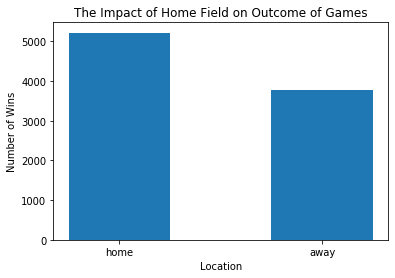

In [8]:
import matplotlib.pyplot as plt
plt.bar(['home','away'],[sum(df["score_home"]>df["score_away"]), sum(df["score_away"]>df["score_home"])],width=0.5)
plt.title('The Impact of Home Field on Outcome of Games')
plt.xlabel('Location')
plt.ylabel('Number of Wins')
plt.show()

C:\Users\kdatt\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Margin of Victory')

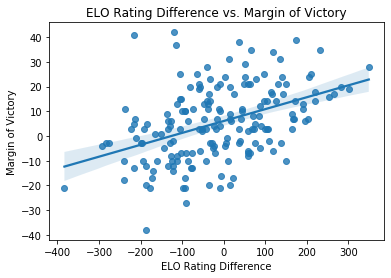

In [10]:
import seaborn as sns
sns.regplot(df["elo_diff_home_minus_away"][::50], df["margin_home_minus_away"][::50]).set_title('ELO Rating Difference vs. Margin of Victory')
plt.xlabel('ELO Rating Difference')
plt.ylabel('Margin of Victory')

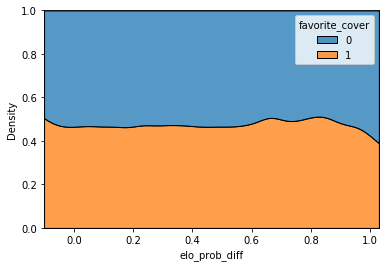

In [14]:
#df1 = df[["qb_elo_diff", "favorite_cover"]]
# sb.distplot(data=df1, x="qb_elo_diff", kind="kde")
#sb.kdeplot(df=df1,x="qb_elo_diff")
sns.kdeplot(data=df[["", "favorite_cover"]], x="elo_prob_diff", hue="favorite_cover", multiple="fill")

In [16]:
home_field = pd.DataFrame()
home_field["Home"] = df["team_home"]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
encoded_array = encoder.fit_transform(home_field)
encoder.get_feature_names()
encoder_df = pd.DataFrame(encoded_array, columns = encoder.get_feature_names())
encoder_df

,x0_ARI,x0_ATL,x0_BAL,x0_BUF,x0_CAR,x0_CHI,x0_CIN,x0_CLE,x0_DAL,x0_DEN,...,x0_NO,x0_NYG,x0_NYJ,x0_OAK,x0_PHI,x0_PIT,x0_SEA,x0_SF,x0_TB,x0_TEN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
list_super = (encoder_df['x0_ARI'] + encoder_df['x0_SEA'] + encoder_df['x0_NO'] + encoder_df['x0_BAL']
+ encoder_df['x0_GB'] + encoder_df['x0_NE'] + encoder_df['x0_PIT'] + encoder_df['x0_DEN'])
df = df.reset_index(drop=True)
df["super_home_advantage"] = list_super

[(0.4, 0.6), (0, 375)]

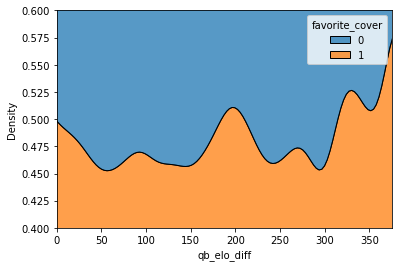

In [39]:
qbplot = sns.kdeplot(data=df[["qb_elo_diff", "favorite_cover"]], x="qb_elo_diff", hue="favorite_cover", multiple="fill")
qbplot.set(xlim=(0,375),ylim=(0.4,0.6))

In [123]:
df_used = df[["elo_difference", "favorite_cover"]]
df_simplified = df_used.tail(6000)[::5]
descriptives = df_simplified.groupby("favorite_cover").agg(["count", "mean", "std", "sem"])
descriptives = descriptives["elo_difference"]
descriptives.reset_index(inplace=True)
descriptives

,favorite_cover,count,mean,std,sem
0,0,626,102.781979,74.678613,2.984758
1,1,574,113.742568,82.743373,3.453642


In [124]:
didnt_cover = df_simplified[df_simplified["favorite_cover"] == 0]["elo_difference"]
did_cover = df_simplified[df_simplified["favorite_cover"] == 1]["elo_difference"]

In [130]:
from scipy import stats
results = stats.ttest_ind(didnt_cover, did_cover)
tstatistic = results[0]
pvalue = results[1]
dof = len(didnt_cover) + len(did_cover) - 2
def report_independent_t (t, p, df):
    print("t(%d)=%.2f, p=%.3f" % (df, t, p))


In [135]:
report_independent_t(tstatistic,pvalue,dof)

t(1198)=-2.41, p=0.016


In [136]:
levene_results = stats.levene(didnt_cover, did_cover)
levene_results

LeveneResult(statistic=4.189769972006118, pvalue=0.04088642802090312)

In [137]:
shapiro_results = stats.shapiro(df_simplified["elo_difference"])
shapiro_results

(0.9333998560905457, 1.0285759181317381e-22)

In [166]:
df_used = df[["home_favorite", "favorite_cover"]]
df_simplified = df_used.head(1000)
descriptives = df_simplified.groupby("favorite_cover").agg(["count", "mean", "std", "sem"])
descriptives = descriptives["home_favorite"]
descriptives.reset_index(inplace=True)
descriptives

,favorite_cover,count,mean,std,sem
0,0,558,0.641577,0.479967,0.020319
1,1,442,0.703620,0.457178,0.021746


In [167]:
fave_didnt_cover = df_simplified[df_simplified["favorite_cover"] == 0]["home_favorite"]
fave_did_cover = df_simplified[df_simplified["favorite_cover"] == 1]["home_favorite"]

In [168]:
from scipy import stats
results = stats.ttest_ind(fave_didnt_cover, fave_did_cover)
tstatistic = results[0]
pvalue = results[1]
dof = len(fave_didnt_cover) + len(fave_did_cover) - 2
def report_independent_t (t, p, df):
    print("t(%d)=%.2f, p=%.3f" % (df, t, p))
pvalue

0.03843208196806325

In [169]:
report_independent_t(tstatistic,pvalue,dof)

t(998)=-2.07, p=0.038


In [170]:
levene_results = stats.levene(didnt_cover, did_cover)
levene_results

LeveneResult(statistic=4.189769972006118, pvalue=0.04088642802090312)

In [172]:
shapiro_results = stats.shapiro(df_simplified["home_favorite"])
shapiro_results

(0.5936613082885742, 3.1389085600875902e-43)

In [30]:
features = df[["home_favorite","elo_difference","qb_elo_diff","elo_prob_diff", "super_home_advantage"]]
target = df["favorite_cover"]

In [31]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(n_neighbors=5), 
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': LinearSVC(max_iter=100),
    'Logistic Regression': LogisticRegression()}

In [32]:
estimators.values()

dict_values([KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), GaussianNB(priors=None, var_smoothing=1e-09), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  

In [179]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
def classifiers_percentage_split():
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=6)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    for estimator_name, estimator_object in estimators.items():
        estimator_object.fit(X=X_train_scaled, y=y_train)
        accuracy = estimator_object.score(X_test_scaled, y_test)
        predicted = estimator_object.predict(X=X_train_scaled)
        expected = y_test
        class_report = classification_report(y_true=expected, y_pred=predicted)
        print(estimator_name)
        print("\t Prediction accuracy on the test data:", f"{accuracy:.2%} \n")
        print(class_report)
        

In [180]:
classifiers_percentage_split()

k-Nearest Neighbor
	 Prediction accuracy on the test data: 49.91% 

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1223
           1       0.45      0.45      0.45      1027

    accuracy                           0.50      2250
   macro avg       0.50      0.50      0.50      2250
weighted avg       0.50      0.50      0.50      2250

Gaussian Naive Bayes
	 Prediction accuracy on the test data: 54.49% 

              precision    recall  f1-score   support

           0       0.55      0.92      0.69      1223
           1       0.51      0.09      0.16      1027

    accuracy                           0.54      2250
   macro avg       0.53      0.51      0.42      2250
weighted avg       0.53      0.54      0.45      2250

Decision Tree
	 Prediction accuracy on the test data: 48.49% 

              precision    recall  f1-score   support

           0       0.53      0.51      0.52      1223
           1       0.44      0.45   

C:\Users\kdatt\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



	 Prediction accuracy on the test data: 54.27% 

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      1223
           1       0.47      0.02      0.04      1027

    accuracy                           0.54      2250
   macro avg       0.51      0.50      0.37      2250
weighted avg       0.51      0.54      0.40      2250

Logistic Regression
	 Prediction accuracy on the test data: 54.36% 

              precision    recall  f1-score   support

           0       0.54      0.99      0.70      1223
           1       0.50      0.01      0.02      1027

    accuracy                           0.54      2250
   macro avg       0.52      0.50      0.36      2250
weighted avg       0.52      0.54      0.39      2250



In [176]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

param_grid = {"max_iter":[10, 100, 1000],"C":[0.000001,.00001,.0001,.001]}
from sklearn.model_selection import train_test_split

#import GridSearchCV and fit GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5)

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=6)

#fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X=X_train, y=y_train)

#result of grid search
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

#the performance of the best found parameters on the test set
#this is what you report for the evaluation of your model
print("Test set score: ", grid_search.score(X_test, y_test))
print("^^^^^WE GOT 55%^^^")

C:\Users\kdatt\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kdatt\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kdatt\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kdatt\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kdatt\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Best parameters:  {'C': 1e-06, 'max_iter': 100}
Best cross-validation score:  0.5262222222222223
Test set score:  0.5462222222222223
^^^^^WE GOT 55%^^^


C:\Users\kdatt\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
